#EDA

In [1]:
import os
import cv2

# Define the directory path
base_path = 'images/train'

# Load images
data = []
labels = []

# Loop over the folders
for folder in os.listdir(base_path):
    if os.path.isdir(os.path.join(base_path, folder)):
        for file in os.listdir(os.path.join(base_path, folder)):
            img_path = os.path.join(base_path, folder, file)
            img = cv2.imread(img_path)
            if img is not None:
                data.append(img)
                labels.append(folder)


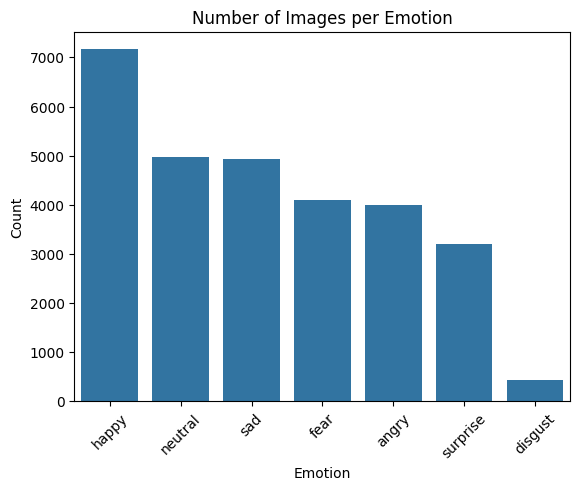

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert labels to a DataFrame
label_df = pd.DataFrame(labels, columns=['Emotion'])

# Count the number of images per emotion
emotion_count = label_df['Emotion'].value_counts()

# Plot the distribution
sns.barplot(x=emotion_count.index, y=emotion_count.values)
plt.title('Number of Images per Emotion')
plt.ylabel('Count')
plt.xlabel('Emotion')
plt.xticks(rotation=45)
plt.show()


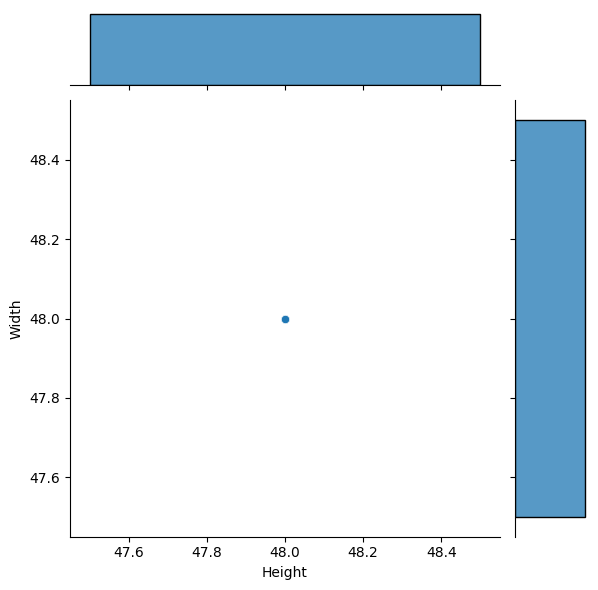

In [3]:
# Get image sizes
sizes = [img.shape for img in data]

# Convert to DataFrame
size_df = pd.DataFrame(sizes, columns=['Height', 'Width', 'Channels'])

# Plot the size distribution
sns.jointplot(x='Height', y='Width', data=size_df, kind='scatter')
plt.show()


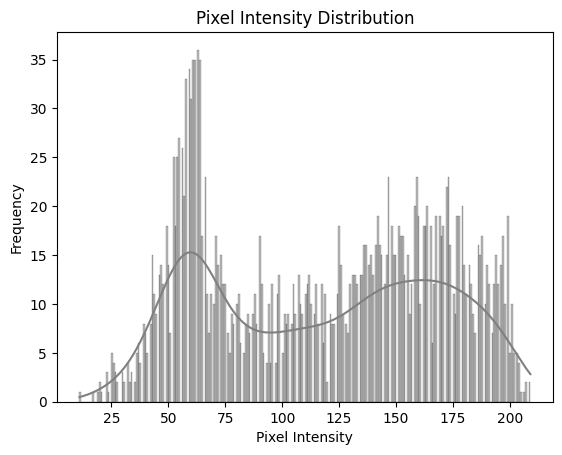

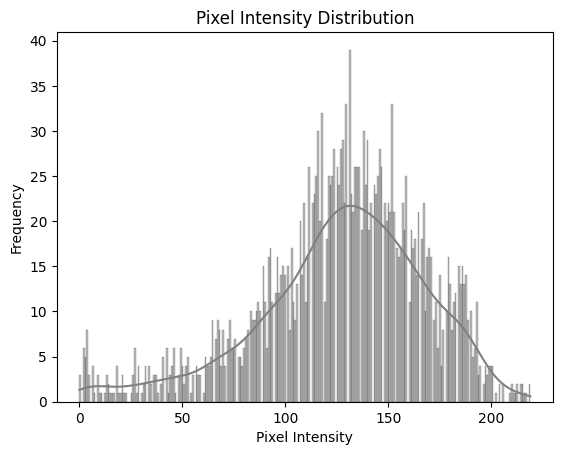

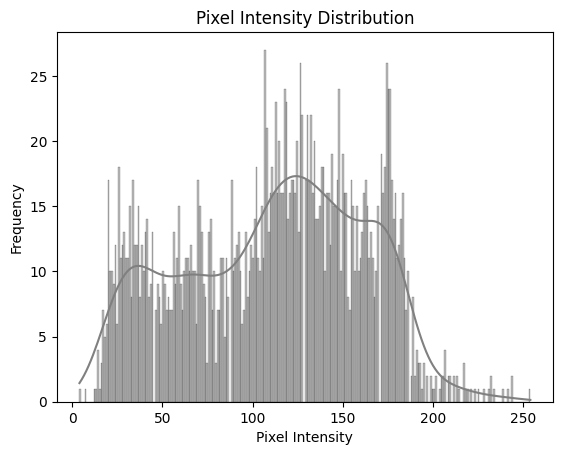

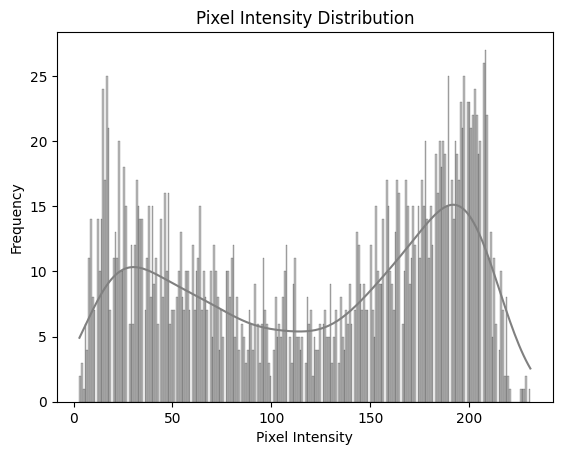

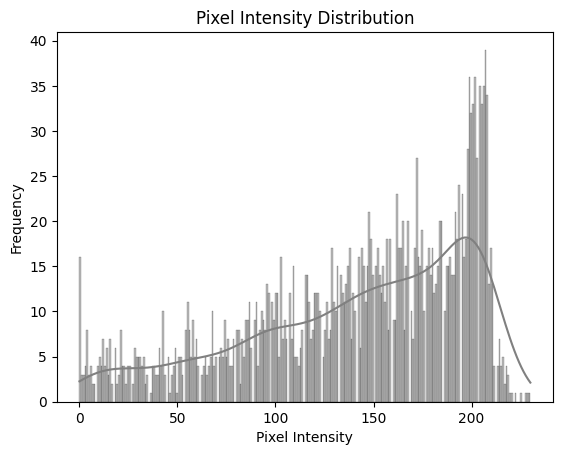

In [4]:
# Convert images to grayscale and plot their pixel intensity distribution
for img in data[:5]:  # Taking first 5 images for demonstration
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sns.histplot(gray.ravel(), bins=256, color='gray', kde=True)
    plt.title('Pixel Intensity Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()


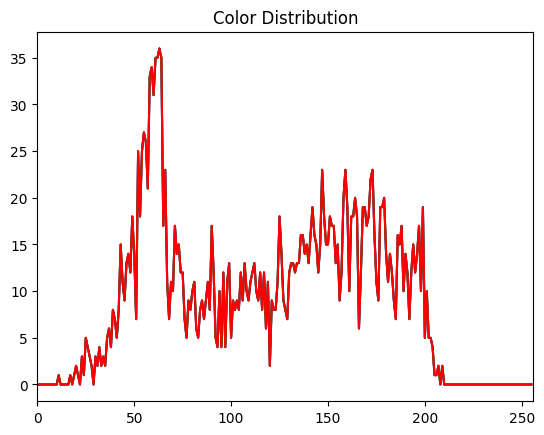

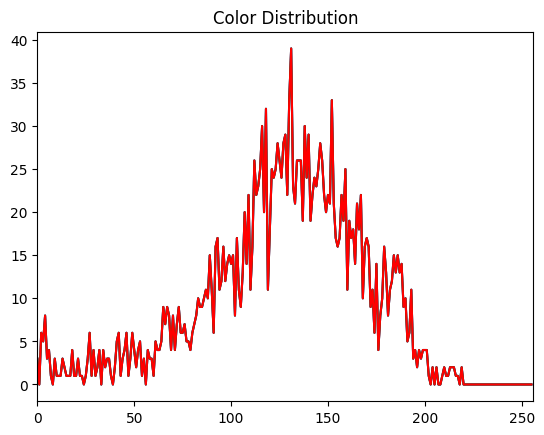

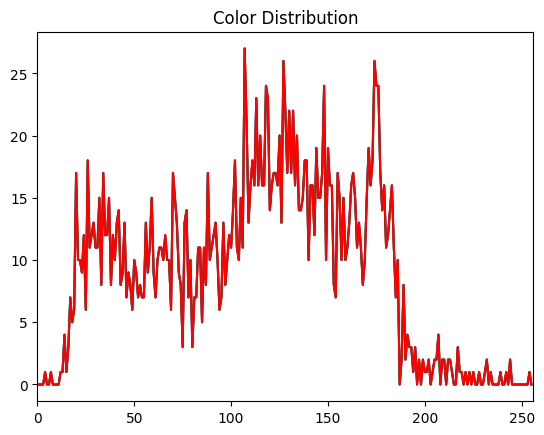

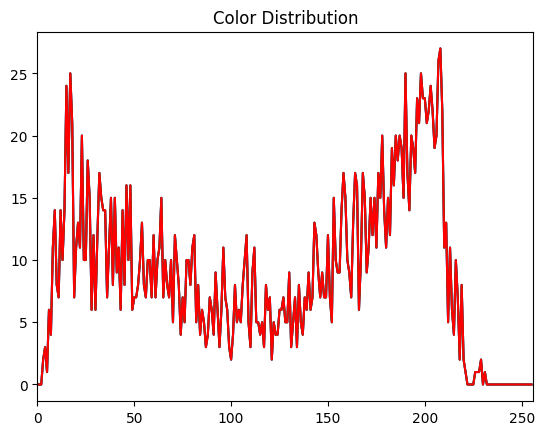

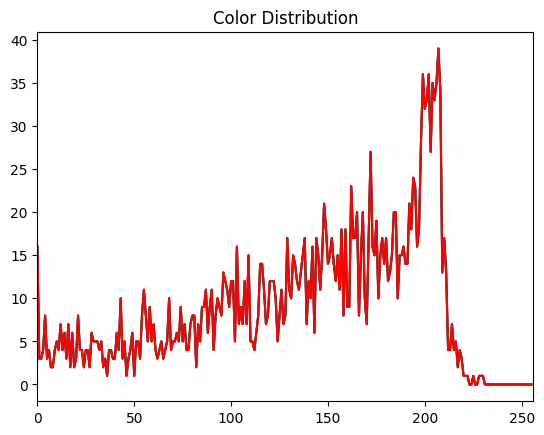

In [5]:
# Plot color distribution for the first 5 images
for img in data[:5]:
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histr = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(histr, color=col)
        plt.xlim([0, 256])
    plt.title('Color Distribution')
    plt.show()


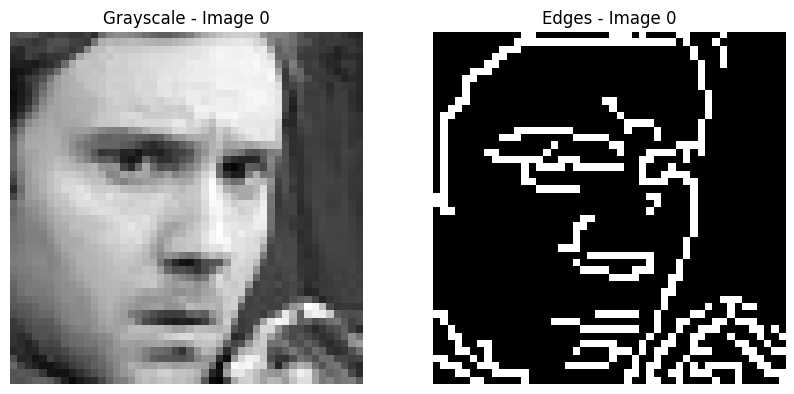

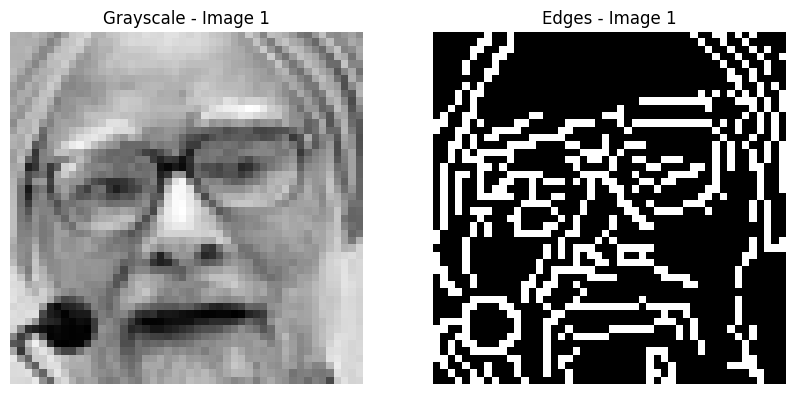

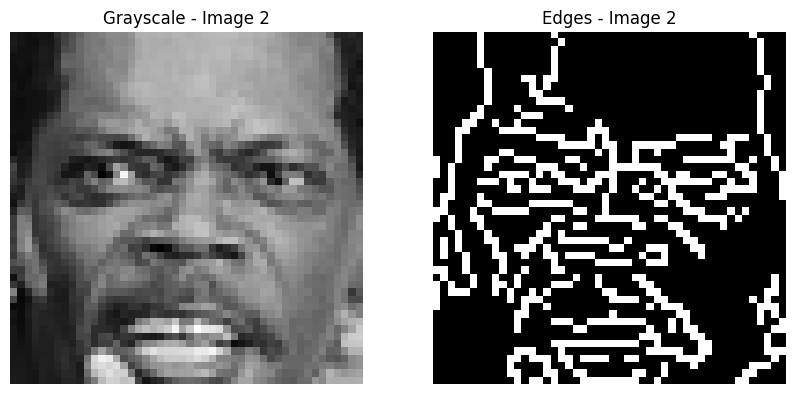

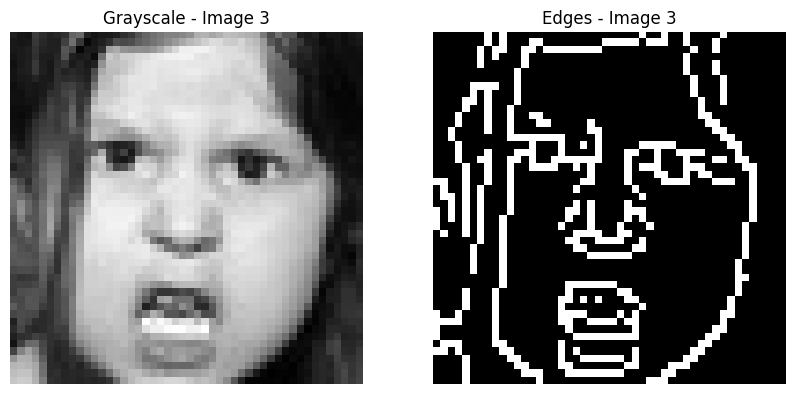

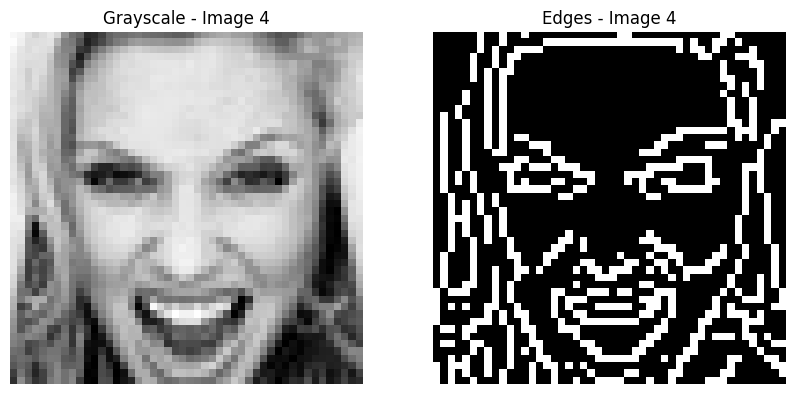

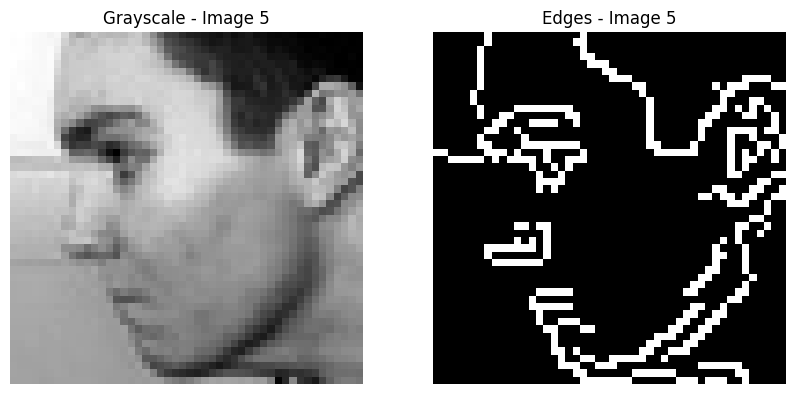

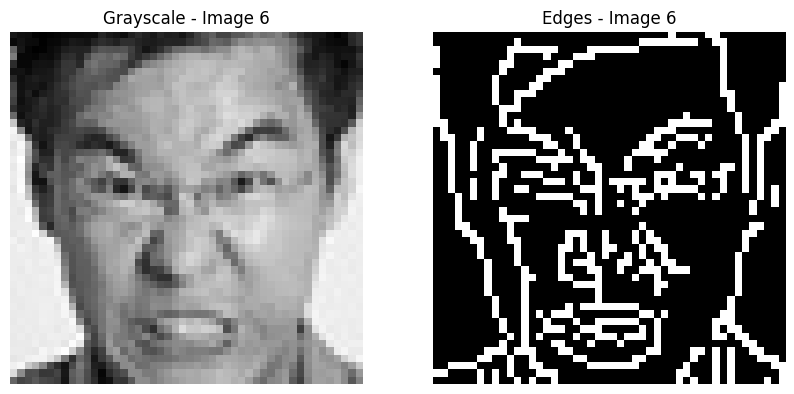

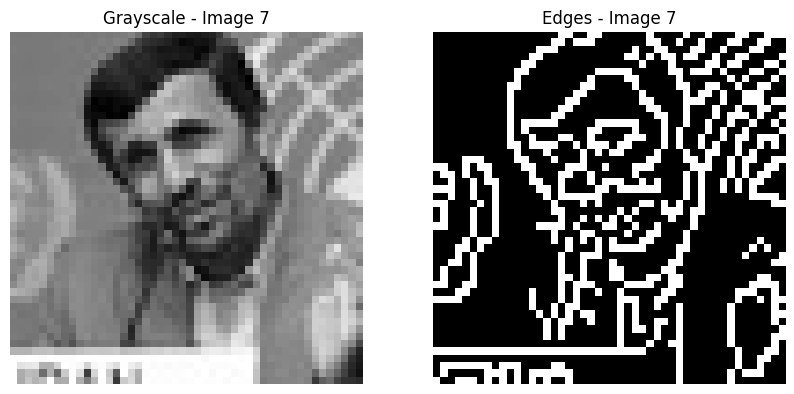

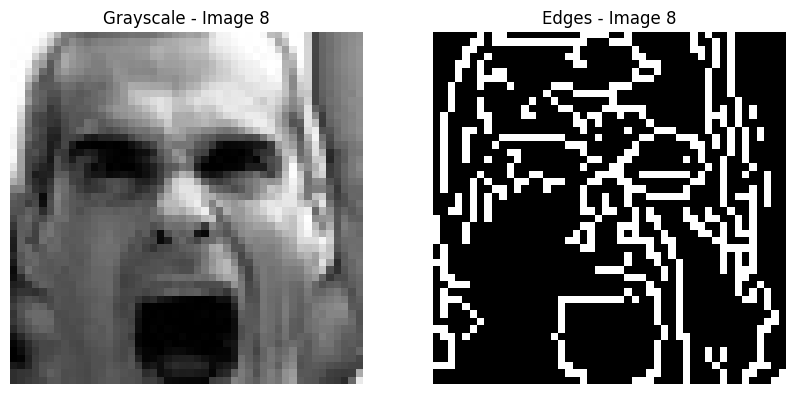

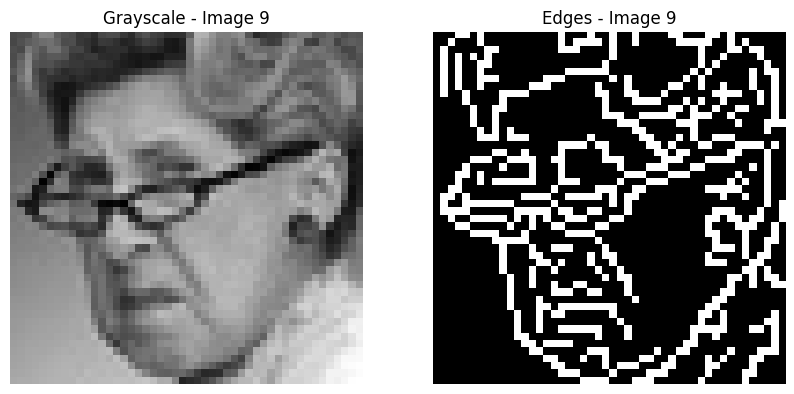

In [6]:
import cv2
import numpy as np

# Convert an image to grayscale and detect edges
def process_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    return gray, edges

# Process a subset of images
processed_images = [process_image(img) for img in data[:10]]

# Display the processed images
for i, (gray, edges) in enumerate(processed_images):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(gray, cmap='gray')
    plt.title(f'Grayscale - Image {i}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title(f'Edges - Image {i}')
    plt.axis('off')

    plt.show()


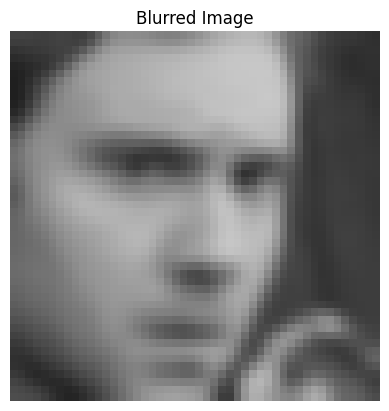

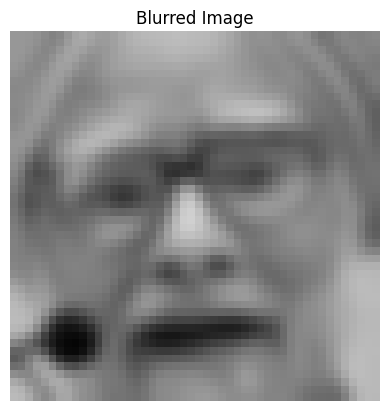

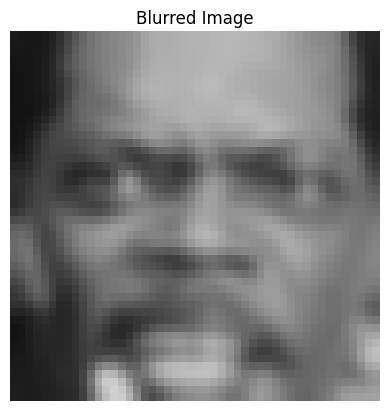

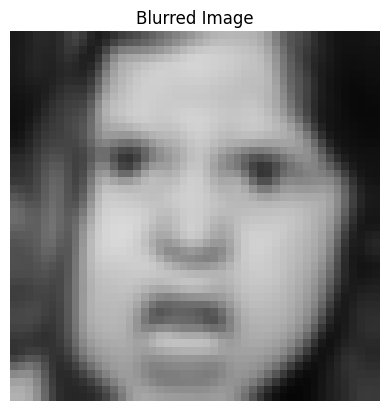

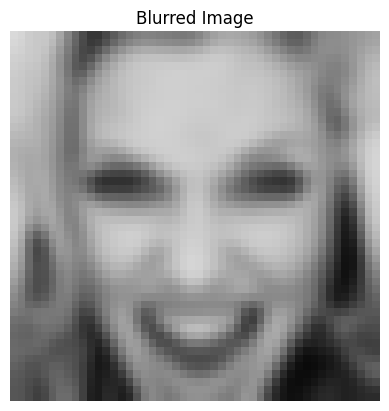

In [7]:
# Apply Gaussian blur to the first 5 images
for img in data[:5]:
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
    plt.title('Blurred Image')
    plt.axis('off')
    plt.show()


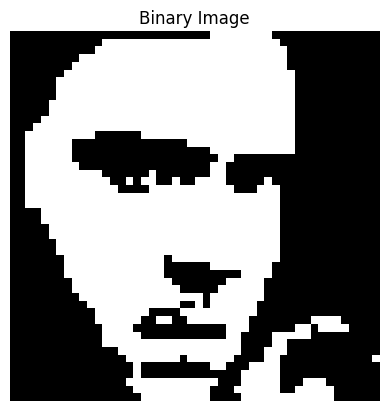

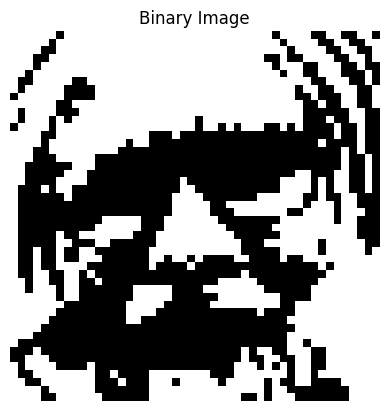

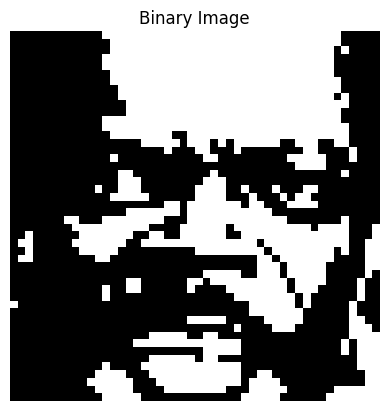

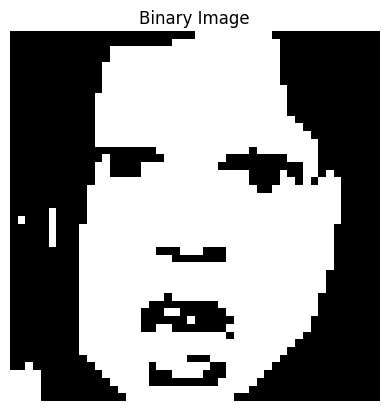

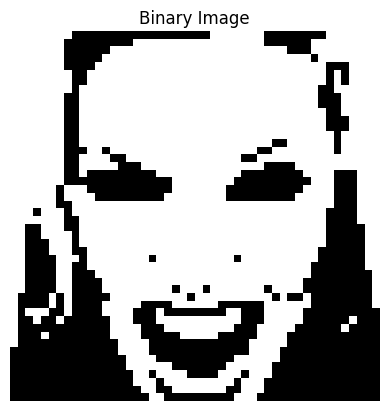

In [8]:
# Apply thresholding to the first 5 images
for img in data[:5]:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    plt.imshow(binary, cmap='gray')
    plt.title('Binary Image')
    plt.axis('off')
    plt.show()


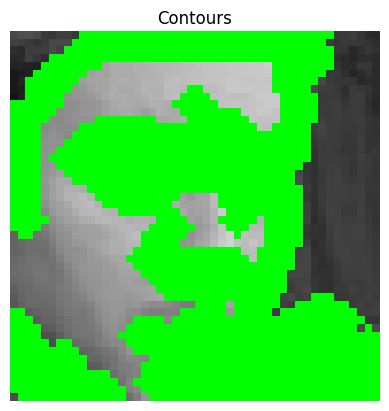

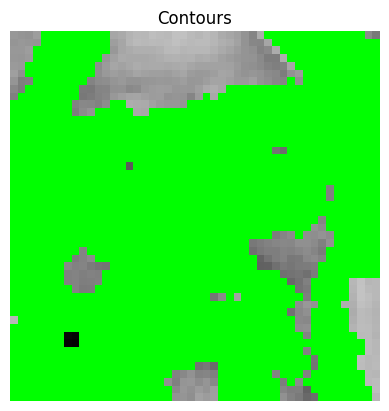

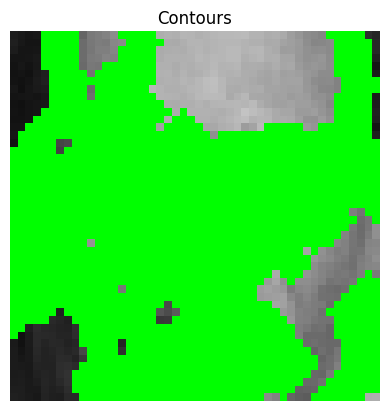

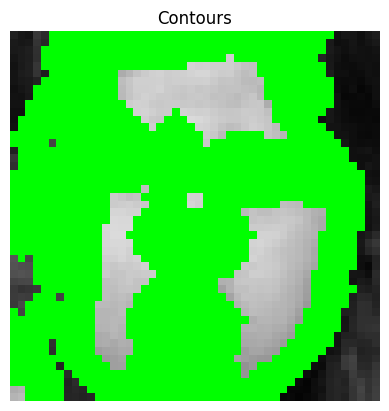

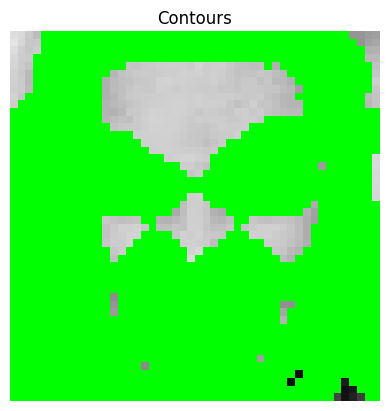

In [9]:
# Detect contours in the first 5 images
for img in data[:5]:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contour_img = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 3)
    plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
    plt.title('Contours')
    plt.axis('off')
    plt.show()


#model creation

In [10]:
# Importing necessary libraries for data handling and visualization
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Keras modules for image processing and augmentation
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

# Keras layers for building the neural network model
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D
from keras.layers import Flatten, Conv2D, BatchNormalization
from keras.layers import Activation, MaxPooling2D

# Model utilities from Keras
from keras.models import Model, Sequential

# Importing optimizers from TensorFlow's keras API
from tensorflow.keras.optimizers import RMSprop, SGD, Adam


In [11]:
picture_size = 48
folder_path = "images/"

In [12]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [13]:
# Define the number of output categories
class_count = 7

# Initialize a sequential model
neural_net = Sequential()

# First convolutional layer
neural_net.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
neural_net.add(BatchNormalization())
neural_net.add(Activation('relu'))
neural_net.add(MaxPooling2D(pool_size=(2, 2)))
neural_net.add(Dropout(0.25))

# Second convolutional layer
neural_net.add(Conv2D(128, (5, 5), padding='same'))
neural_net.add(BatchNormalization())
neural_net.add(Activation('relu'))
neural_net.add(MaxPooling2D(pool_size=(2, 2)))
neural_net.add(Dropout(0.25))

# Third convolutional layer
neural_net.add(Conv2D(512, (3, 3), padding='same'))
neural_net.add(BatchNormalization())
neural_net.add(Activation('relu'))
neural_net.add(MaxPooling2D(pool_size=(2, 2)))
neural_net.add(Dropout(0.25))

# Fourth convolutional layer
neural_net.add(Conv2D(512, (3, 3), padding='same'))
neural_net.add(BatchNormalization())
neural_net.add(Activation('relu'))
neural_net.add(MaxPooling2D(pool_size=(2, 2)))
neural_net.add(Dropout(0.25))

# Flatten the output to feed into the dense layers
neural_net.add(Flatten())

# First fully connected layer
neural_net.add(Dense(256))
neural_net.add(BatchNormalization())
neural_net.add(Activation('relu'))
neural_net.add(Dropout(0.25))

# Second fully connected layer
neural_net.add(Dense(512))
neural_net.add(BatchNormalization())
neural_net.add(Activation('relu'))
neural_net.add(Dropout(0.25))

# Output layer with softmax activation for classification
neural_net.add(Dense(class_count, activation='softmax'))

# Optimizer configuration
optimizer = Adam(learning_rate=0.0001)


In [14]:
neural_net.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
neural_net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [20]:
# Importing necessary callbacks for model training
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Setting up the model checkpointing to save the best model
model_saver = ModelCheckpoint(
    "cnn.h5",  # Changed the file name for uniqueness
    monitor='val_accuracy',  # Updated 'val_acc' to 'val_accuracy' for the latest API
    verbose=1,
    save_best_only=True,
    mode='max'
)

# Configuring early stopping to prevent overfitting
stopping_criteria = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=1,
    restore_best_weights=True
)

# Adjusting the learning rate based on the validation loss performance
lr_adjustment = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.0001
)

# Compiling the list of callbacks to be used during training
callback_procedures = [stopping_criteria, model_saver, lr_adjustment]

# Number of epochs to train the model
training_epochs =2

# Compiling the model with categorical crossentropy loss and an Adam optimizer
neural_net.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.1),  # Updated 'lr' to 'learning_rate' for clarity
    metrics=['accuracy']
)


In [21]:
# Training the neural network using the fit method (fit_generator is deprecated)
training_history = neural_net.fit(
    x=train_set,  # Updated to use 'x=' for clarity
    steps_per_epoch=train_set.n // train_set.batch_size,
    epochs=training_epochs,  # Updated to use the renamed 'training_epochs' variable
    validation_data=test_set,
    validation_steps=test_set.n // test_set.batch_size,
    callbacks=callback_procedures  # Updated to use the renamed 'callback_procedures' variable
)


Epoch 1/2
225/225 [==============================] - ETA: 0s - loss: 2.0064 - accuracy: 0.2430
Epoch 1: val_accuracy improved from -inf to 0.25241, saving model to cnn.h5
225/225 [==============================] - 738s 3s/step - loss: 2.0064 - accuracy: 0.2430 - val_loss: 1.8294 - val_accuracy: 0.2524 - lr: 0.1000
Epoch 2/2
 83/225 [==========>...................] - ETA: 10:31 - loss: 1.8091 - accuracy: 0.2459

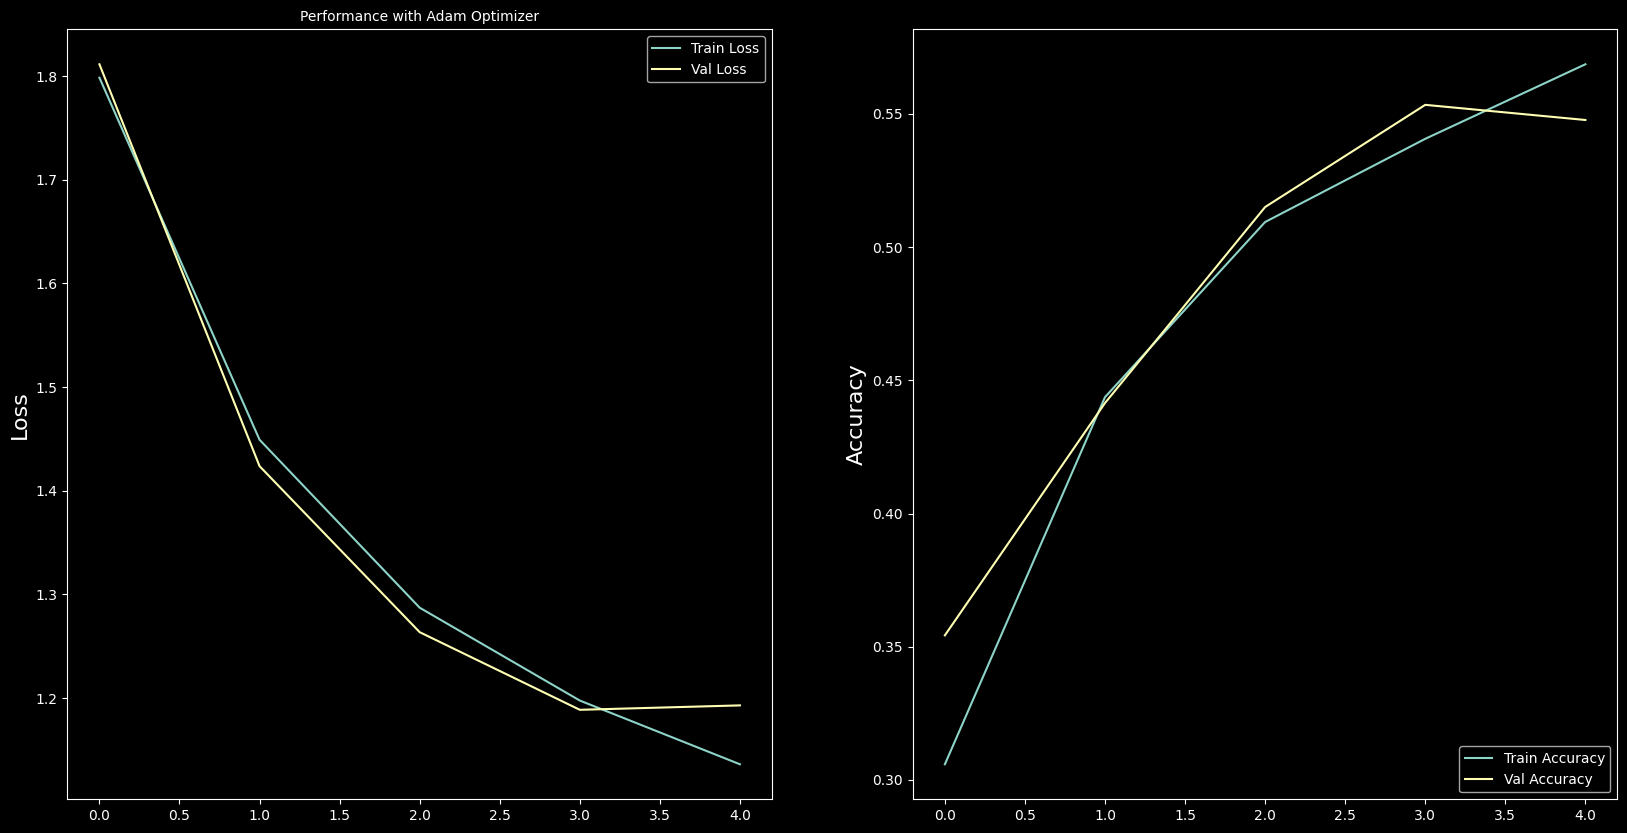

In [18]:
# Set the plotting style for a dark theme
plt.style.use('dark_background')

# Initialize a new figure with a specified size
plt.figure(figsize=(20, 10))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.title('Performance with Adam Optimizer', fontsize=10)  # Changed the title text
plt.ylabel('Loss', fontsize=16)
# Access the loss history for plotting
plt.plot(training_history.history['loss'], label='Train Loss')
plt.plot(training_history.history['val_loss'], label='Val Loss')  # Shortened 'Validation' to 'Val'
plt.legend(loc='upper right')

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
# Access the accuracy history for plotting
plt.plot(training_history.history['accuracy'], label='Train Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Val Accuracy')  # Shortened 'Validation' to 'Val'
plt.legend(loc='lower right')

# Display the plots
plt.show()
